## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def beauty_derivative_plot(x_point):
    def f(x):
        return 2 * np.sin(x) - np.cos(2 * x)

    def f_prime(x):
        return 2 * np.cos(x) + 2 * np.sin(2 * x)

    x_values = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

    y_f = f(x_values)
    y_f_prime = f_prime(x_values)

    t_values = np.array([x_point - 0.2 * np.pi, x_point + 0.2 * np.pi])
    slope = f_prime(x_point)
    y_point = f(x_point)
    tangent_line = slope * (t_values - x_point) + y_point

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_f, label=r'$f(x) = 2\sin x - \cos{2x}$', color='blue')
    plt.plot(x_values, y_f_prime, label=r"$f'(x) = 2\cos x + 2\sin{2x}$", color='red', linestyle='--')
    plt.plot(t_values, tangent_line, label=f'Tangent at $x = {x_point:.2f}$', color='green')
    plt.plot([0, x_point], [y_point, y_point], color='purple', linestyle='--')
    plt.plot([x_point, x_point], [0, y_point], color='purple', linestyle='--')
    plt.scatter([x_point], [y_point], color='red')
    plt.text(x_point, y_point + 0.5 * np.sign(y_point), f'f({x_point:.2f}) = {y_point:.2f}')

    plt.title('Function, Derivative, and Tangent Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.show()

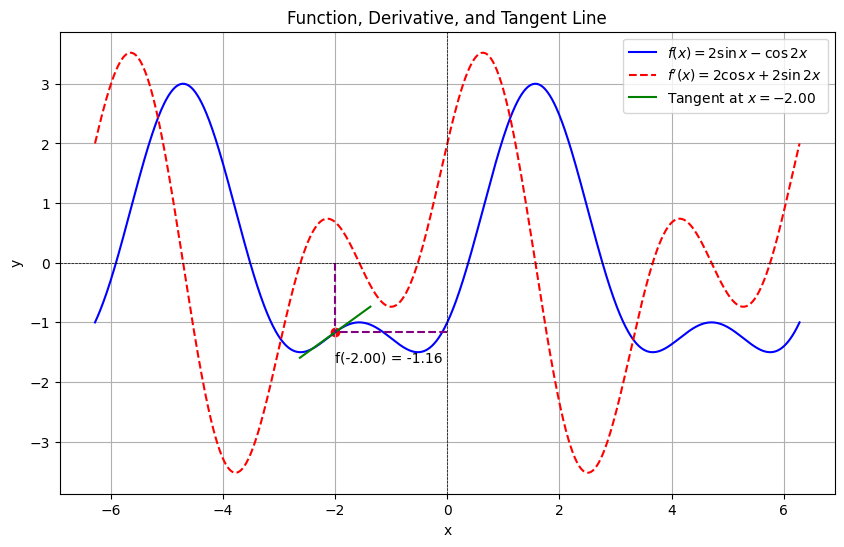

In [ ]:
beauty_derivative_plot(-2.0)

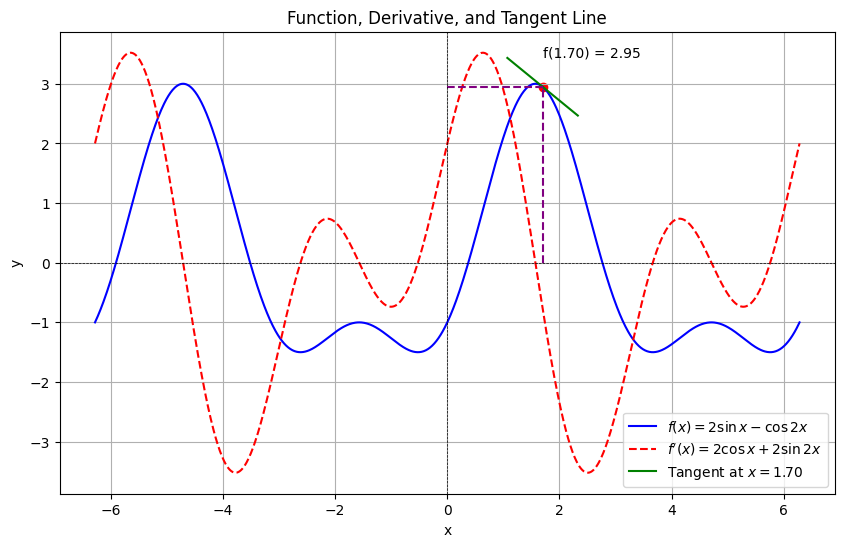

In [ ]:
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

In [ ]:
with open('populations.txt') as f:
    f_content = f.read()

In [ ]:
df = np.array(list(map(lambda x: list(map(float, x.split())), f_content.split('\n')[1:-1])))
header = np.array(f_content.split('\n')[0].split()[1:])

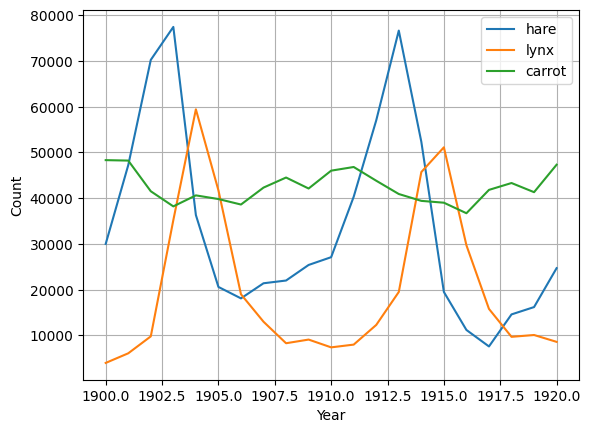

In [ ]:
i = 1
plt.plot(df[:, 0], df[:, i], label=header[i])

i = 2
plt.plot(df[:, 0], df[:, i], label=header[i])

i = 3
plt.plot(df[:, 0], df[:, i], label=header[i])

plt.grid(True)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

In [ ]:
best_idcs = np.argmax(df[:, 1:], axis=0)
best_years = df[best_idcs, 0]
best_counts = df[best_idcs, np.arange(1, 4, dtype=int)]

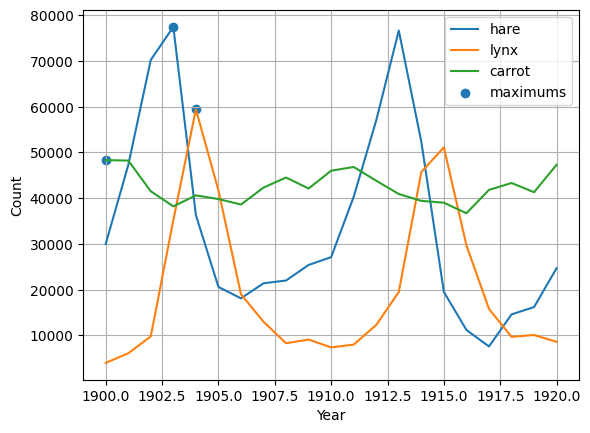

In [ ]:
i = 1
plt.plot(df[:, 0], df[:, i], label=header[i])

i = 2
plt.plot(df[:, 0], df[:, i], label=header[i])

i = 3
plt.plot(df[:, 0], df[:, i], label=header[i])

plt.scatter(best_years, best_counts, label='maximums')

plt.grid(True)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

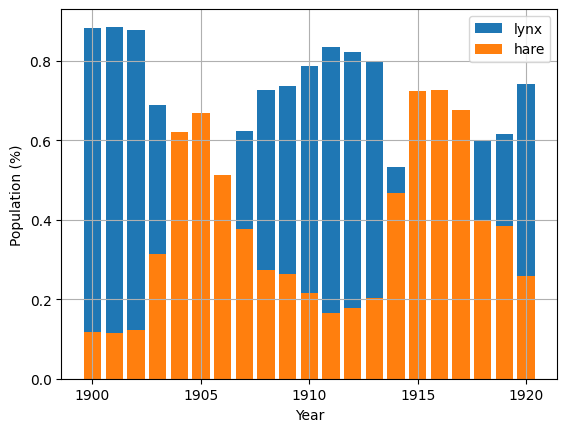

In [ ]:
plt.bar(df[:, 0], df[:, 1] / df[:, [1, 2]].sum(axis=1), label='lynx')
plt.bar(df[:, 0], df[:, 2] / df[:, [1, 2]].sum(axis=1), label='hare')

plt.grid(True)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population (%)')

plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

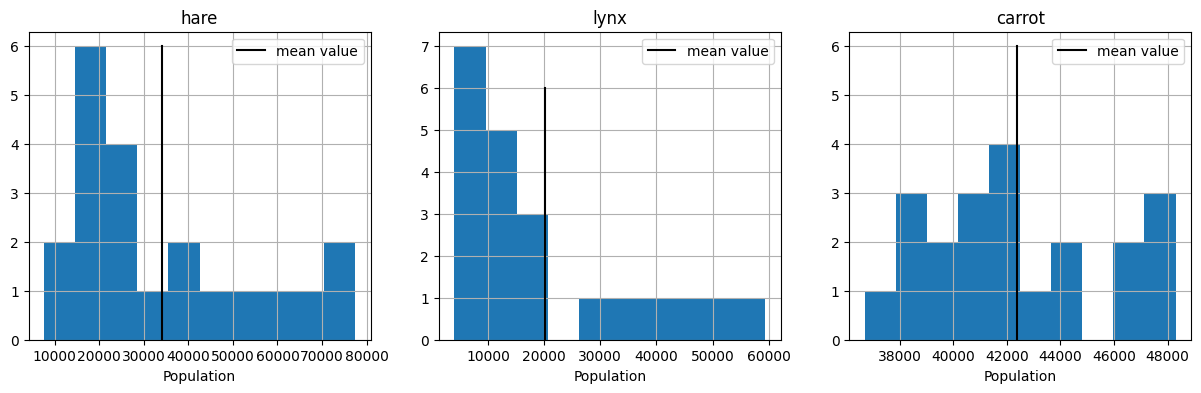

In [ ]:
means = np.mean(df, axis=0)
stds = np.std(df, axis=0)

fig = plt.figure(figsize=(15, 4))

ax = fig.subplots(1, 3)

bins, _, _ = ax[0].hist(df[:, 1])
ax[0].plot([means[1], means[1]], [0, np.max(bins)], color='black', label='mean value')
ax[1].hist(df[:, 2])
ax[1].plot([means[2], means[2]], [0, np.max(bins)], color='black', label='mean value')
ax[2].hist(df[:, 3])
ax[2].plot([means[3], means[3]], [0, np.max(bins)], color='black', label='mean value')

ax[0].set_title(header[1])
ax[0].grid(True)
ax[0].legend()
ax[0].set_xlabel('Population')

ax[1].set_title(header[2])
ax[1].grid(True)
ax[1].legend()
ax[1].set_xlabel('Population')

ax[2].set_title(header[3])
ax[2].grid(True)
ax[2].legend()
ax[2].set_xlabel('Population')

plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

[H, H, H, H, L, L, L, H, H, H, H, H, H, H, H, L, L, L, H, H, H]


[]

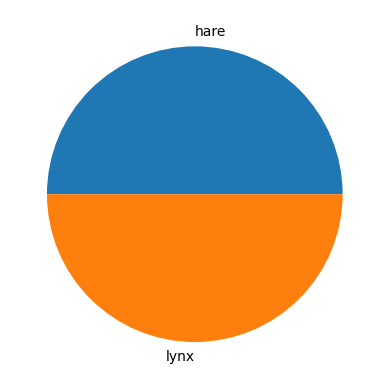

In [138]:
m = np.array(['H', 'L'])

res = m[np.argmax(df[:, 1:3], axis=1)]

print('['+ ', '.join(res) + ']')

plt.pie([len(res == 'H'), len(res == 'L')], labels=[header[1], header[2]])
plt.plot()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

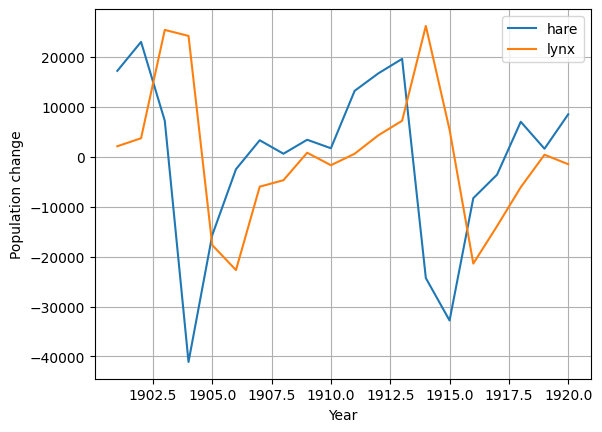

In [143]:
changes = df[1:] - df[:-1]

i = 1
plt.plot(df[1:, 0], changes[:, i], label=header[i])

i = 2
plt.plot(df[1:, 0], changes[:, i], label=header[i])


plt.grid(True)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population change')

plt.show()

In [152]:
print(f'Corrcoef: {np.corrcoef(changes[:, 1], changes[:, 2])[1, 0]:.4f}')

Corrcoef: -0.1780


- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

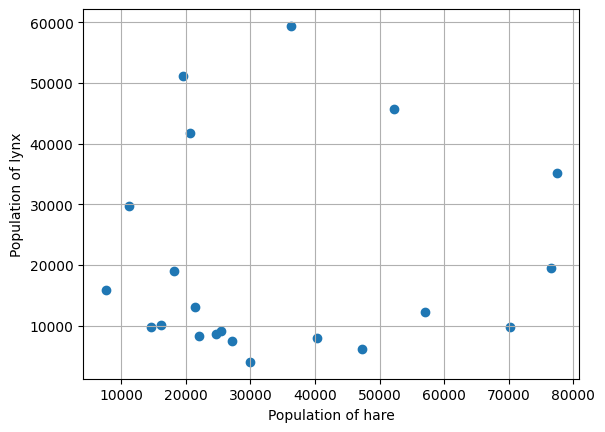

In [157]:
plt.scatter(df[:, 1], df[:, 2])

plt.xlabel(f'Population of {header[1]}')
plt.ylabel(f'Population of {header[2]}')

plt.grid(True)

plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

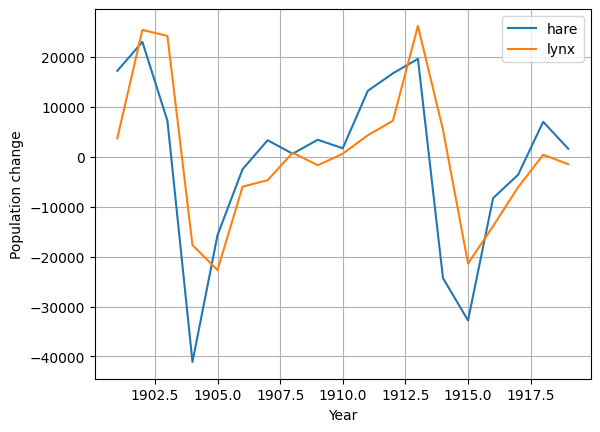

In [182]:
changes = df[1:] - df[:-1]

i = 1
plt.plot(df[1:-1, 0], changes[:-1, i], label=header[i])

i = 2
plt.plot(df[1:-1, 0], changes[1:, i], label=header[i])


plt.grid(True)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population change')

plt.show()

In [228]:
X = np.concatenate([df[:-1, 1:2], df[1:, 1:2], df[:-1, 2:3]], axis=1)
y = df[1:-1, 2]

X_b = np.c_[np.ones((X.shape[0] - 1, 1)), X[:-1]]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(f'Predicted: {round((X[-1:].dot(theta[1:]) + theta[0]).item())}')
print(f'True: {round(df[-1, 2])}')

Predicted: 5706
True: 8600
